# **COMPARADOR DE MODELOS**

In [2]:
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score


#from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import ShuffleSplit 

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.pipeline import Pipeline

In [4]:
X_train = pd.read_csv('../Data/X_train.csv', index_col=0)
X_test = pd.read_csv('../Data/X_test.csv', index_col= 0)
y_train = pd.read_csv('../Data/y_train.csv', index_col= 0)
y_test = pd.read_csv('../Data/y_test.csv', index_col= 0)

In [199]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5917, 16)
(1480, 16)
(5917, 1)
(1480, 1)


Las relaciones lineales entre X_train y los precios de la vivienda se muestran en la siguiente gráfica:

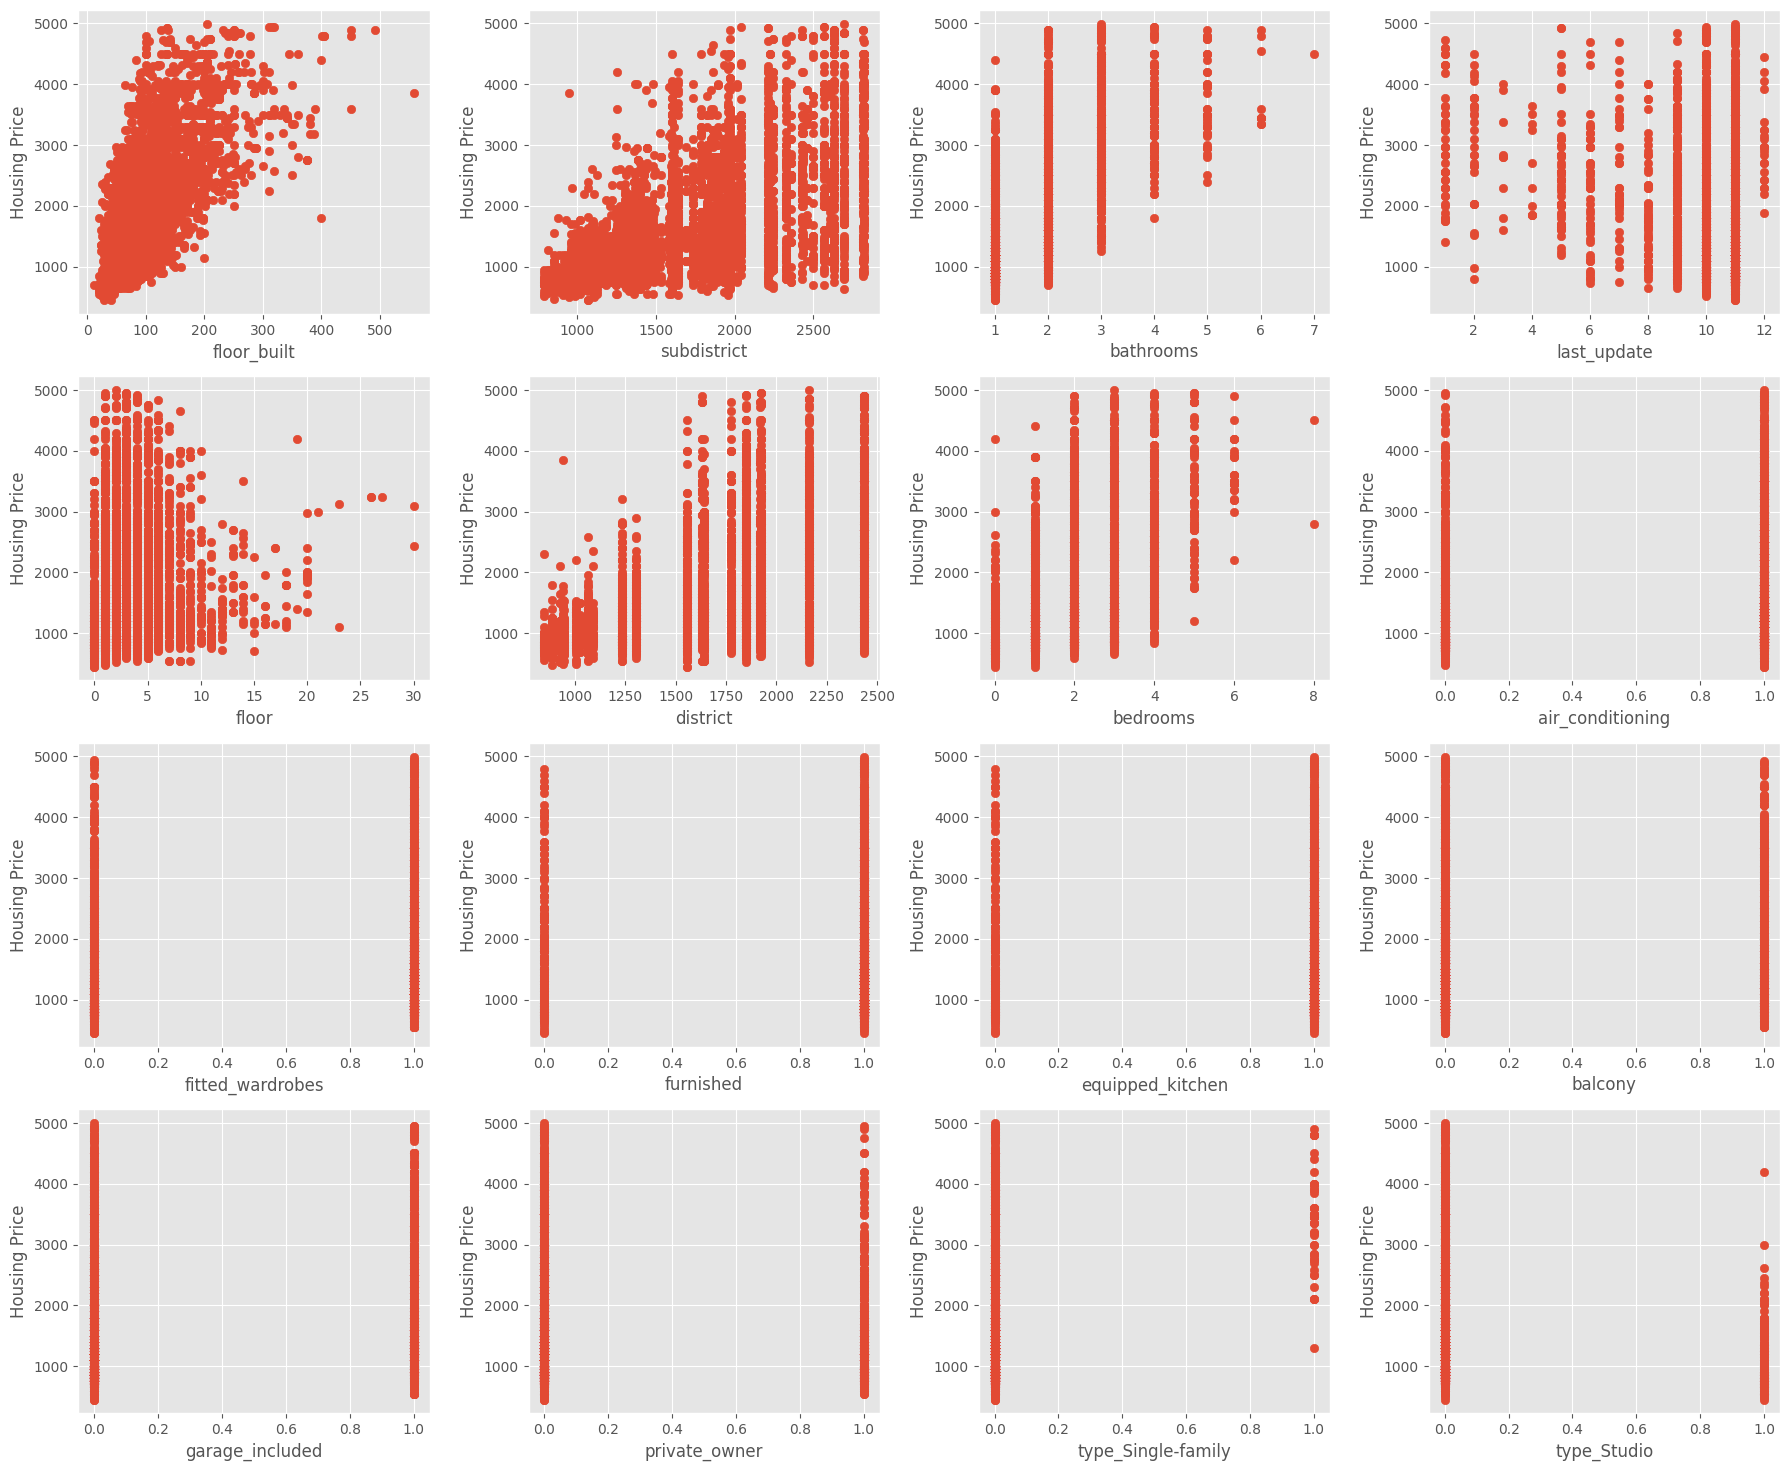

In [202]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig = plt.figure(figsize=(18,18))

for index, column in enumerate(X_train.columns):
    ax = fig.add_subplot(5,4,index+1)
    ax.scatter(X_train[column],y_train['price'])
    ax.set_ylabel('Housing Price', size=12)
    ax.set_xlabel(str(column), size=12)

plt.tight_layout()
plt.show()

Aparentemente se ven escasas relaciones lineales entre las features y nuestro target. Los modelos que trabajan linealmente, como la Regresión Lineal, no parecen ser candidatos a ser el mejor modelo de predicción.

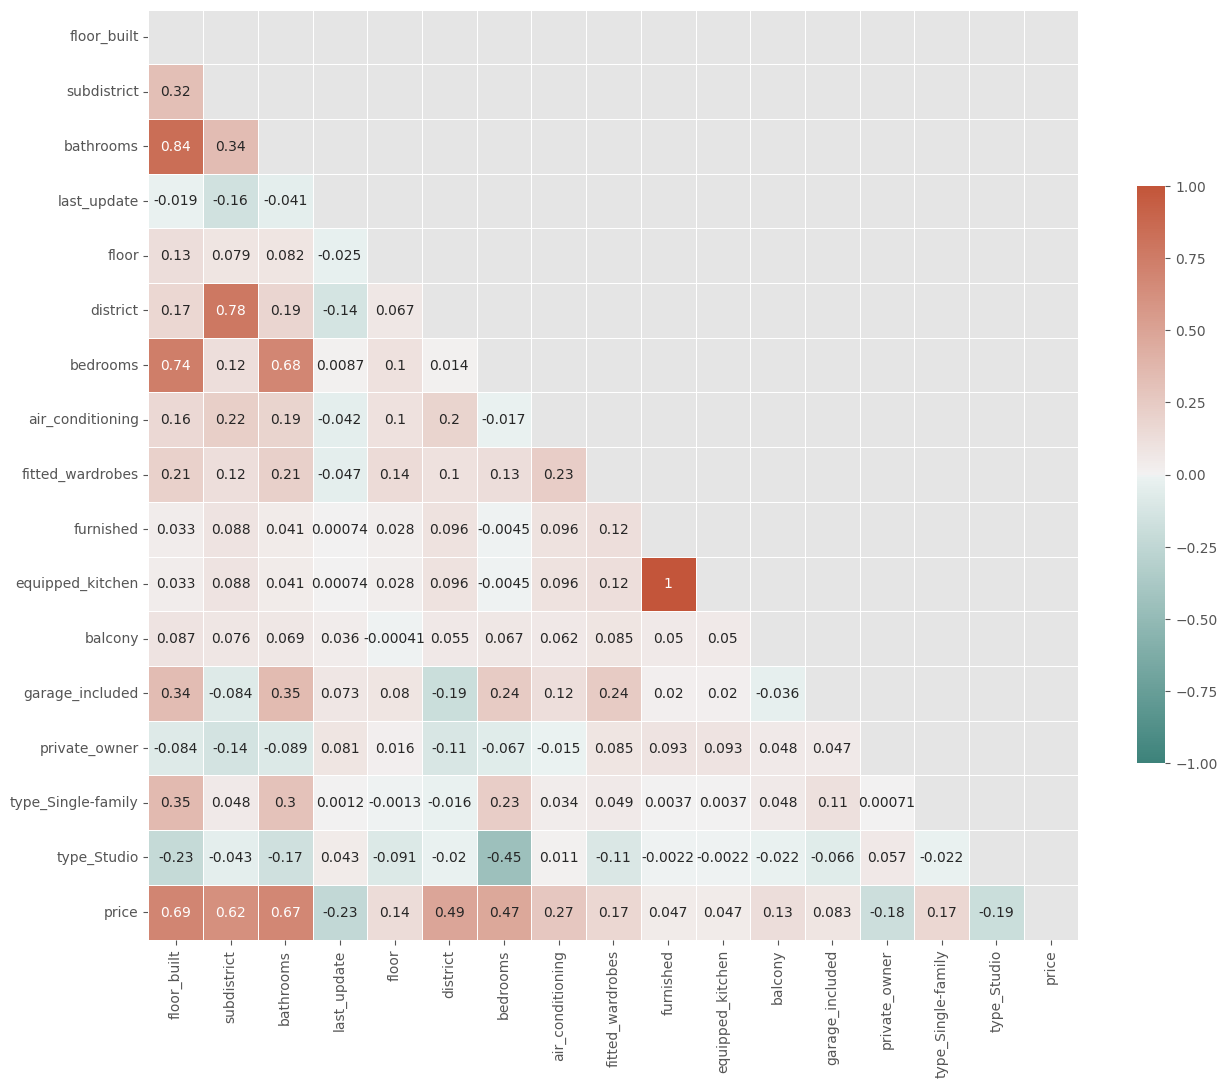

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# combinar X_train y y_train en un solo DataFrame
train_data = pd.concat([X_train, y_train], axis=1)

# generar la matriz de correlación
correlation = train_data.corr()

# crear la máscara triangular superior
mask = np.zeros_like(correlation, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# crear el gráfico de correlación
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(180, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

### Estandarizamos X_train y X_test

In [205]:
scale = StandardScaler()
scale.fit(X_train)
X_train_scale = scale.transform(X_train)
X_test_scale = scale.transform(X_test)

In [421]:
results = []  #creamos una lista vacía donde se irán recogiendo los resultados de cada modelo

## - `1. Regresión Lineal`

### -Quitando pocas columnas:

In [207]:
#Primero vemos que tal la predicción en x_train para ver riesgo de overfitting
lr = LinearRegression()
lr.fit(X_train_scale, y_train)

r2_train = r2_score(y_train, lr.predict(X_train_scale)) 
mse = mean_squared_error(y_train, lr.predict(X_train_scale))
print('r2 train:', r2_train)
print("mse train:", mse)

r2 train: 0.7236248380409595
mse train: 235097.55106018894


In [208]:
#Vamos a predecir X_test
prediccion = lr.predict(X_test_scale)

<AxesSubplot:xlabel='Prediction', ylabel='price'>

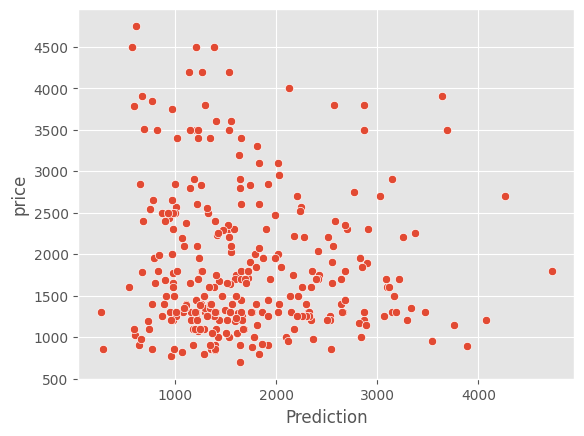

In [209]:
#Visualizamos las predicciones frente a los valores reales

y_pred = pd.DataFrame(lr.predict(X_test_scale), columns = ['Prediction'])
sns.scatterplot(x=y_pred['Prediction'], y=y_test['price'])

Vemos que no se ajustan muy bien las predicciones a los valores reales.

In [210]:
#calculamos el error y score en xtest

r2_test = r2_score(y_test, lr.predict(X_test_scale)) 
mse = mean_squared_error(y_test, lr.predict(X_test_scale))
print('r2 test:', r2_test)
print("mse test:", mse)

r2 test: 0.6932328156300367
mse test: 257445.28806761777


In [422]:
model1_results = {'Model': 'Regresion Lineal',
                 'Best Params': '--',
                 'Train score': r2_train,
                 'Test score': r2_test }

results.append(model1_results)

------------------

## - `2. Regularización`

In [218]:
#Hacemos un GridSearchCV de todos los modelos de Regularización para ver cual de ellos sería el mejor modelo con los mejores parámetros


Reg = Pipeline(steps=[("scaler", StandardScaler()), ("regressor", None)])

ridge_params = {
    'regressor': [Ridge()],
    'regressor__alpha': np.logspace(-10,10,20)
}

lasso_params = {
    'regressor': [Lasso()],
    'regressor__alpha': np.logspace(-10,10,20)
}

elasticnet_params = {
    'regressor': [ElasticNet()],
    'regressor__alpha': np.logspace(-10,10,20),
    'regressor__l1_ratio': np.arange(0,1.05,0.05)
}

search_space = [ridge_params, lasso_params, elasticnet_params]

grid = GridSearchCV(Reg,
                   search_space,
                   scoring="neg_mean_absolute_error",
                   cv = 10,
                   n_jobs=-1)

grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', None)]),
             n_jobs=-1,
             param_grid=[{'regressor': [Ridge()],
                          'regressor__alpha': array([1.00000000e-10, 1.12883789e-09, 1.27427499e-08, 1.43844989e-07,
       1.62377674e-06, 1.83298071e-05, 2.06913808e-04, 2.33572147e-03,
       2.63665090e-02, 2.97635144e-01, 3.35981829e+00, 3.79269019e+01,
       4.281...
       1.62377674e-06, 1.83298071e-05, 2.06913808e-04, 2.33572147e-03,
       2.63665090e-02, 2.97635144e-01, 3.35981829e+00, 3.79269019e+01,
       4.28133240e+02, 4.83293024e+03, 5.45559478e+04, 6.15848211e+05,
       6.95192796e+06, 7.84759970e+07, 8.85866790e+08, 1.00000000e+10]),
                          'regressor__l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])}],
             scoring=

In [249]:
reg_params = grid.best_estimator_


In [220]:
grid.best_score_  #neg mean absolute error


-358.21057265405784

In [324]:
reg_train = grid.best_estimator_.score(X_train, y_train)
reg_test = grid.best_estimator_.score(X_test, y_test)
print(score_train)
print(score_test)

0.7236142331131911
0.693130943702679


In [423]:
model2_results = {'Model': 'Regularizacion',
                 'Best Params': reg_params[1] ,
                 'Train score': reg_train,
                 'Test score': reg_test}

results.append(model2_results)

------------

## - `3. KNN Regressor`

In [216]:
#Hacemos un GridSearchCV del KNN para obtener los mejores parámetros

knnreg = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsRegressor())])

knn_params = {
    "knn__n_neighbors": np.arange(7,30,3),
    "knn__weights": ["uniform", "distance"],
    "knn__leaf_size": np.arange(10,51),
    "knn__p": [1, 2]
}

gs_knn = GridSearchCV(knnreg,
knn_params,
cv=10,
scoring = 'neg_mean_squared_error',
n_jobs = -1,
verbose = 1)

gs_knn.fit(X_train, y_train)


Fitting 10 folds for each of 1804 candidates, totalling 18040 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'knn__leaf_size': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50]),
                         'knn__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21]),
                         'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error', verbose=1)

In [335]:
knn_params = gs_knn.best_estimator_
knn_params

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 KNeighborsRegressor(leaf_size=10, n_neighbors=21, p=1,
                                     weights='distance'))])

In [336]:
knn_train = gs_knn.best_estimator_.score(X_train, y_train)
knn_train

0.9993164550473486

In [337]:
knn_test = gs_knn.best_estimator_.score(X_test, y_test)
knn_test

0.7237300689525099

In [ ]:
#Este modelo parece que tiene un grado muy elevado de overfitting. Se ha probado con distintos parámetros, pero no cambia, por 
# lo que no será elegido debido a que se ajusta demasiado a los datos de train y tiene poca capacidad de generalizar a datos nuevos 

In [424]:
model3_results = {'Model': 'KNN Regresor',
                 'Best Params': knn_params[1] ,
                 'Train score': knn_train,
                 'Test score': knn_test}

results.append(model3_results)

-------

## - `4. Arbol de decisión Regressor`

In [211]:

tree = DecisionTreeRegressor(random_state=42)  #no usamos pipeline porque no hay que estandarizar

tree_params = {
    'max_depth': np.arange(2, 20),
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 10),
    'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    'splitter': ["best", "random"],
}

gs_tree = GridSearchCV(tree,
                       tree_params,
                       cv=10,
                       scoring='neg_mean_squared_error',
                       n_jobs=-1,
                       verbose=1)

gs_tree.fit(X_train, y_train)

Fitting 10 folds for each of 23328 candidates, totalling 233280 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=1)

In [340]:
tree_params = gs_tree.best_estimator_
tree_params

DecisionTreeRegressor(max_depth=10, min_samples_leaf=8, min_samples_split=19,
                      random_state=42)

In [341]:
tree_train = gs_tree.best_estimator_.score(X_train, y_train)
tree_train

0.8164395977667072

In [343]:
tree_test = gs_tree.best_estimator_.score(X_test, y_test)
tree_test

0.69609422541357

In [425]:
model4_results = {'Model': 'Decision Tree',
                 'Best Params': tree_params ,
                 'Train score': tree_train,
                 'Test score': tree_test}

results.append(model4_results)

## - `5. SVM Regressor`

In [393]:
svr = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR())])

svr_params = {
    "svr__kernel": ['linear', 'poly', 'rbf', 'sigmoid'] ,
    "svr__degree": [2, 3, 4],
    "svr__gamma": ['scale', 'auto'],
    "svr__C": [0.1, 0.5, 1, 5] ,
    "svr__epsilon": [0.01, 0.1, 0.5, 1],
}

gs_svr = GridSearchCV(svr,
svr_params,
cv=10,
scoring = 'neg_mean_squared_error',
n_jobs = -1,
verbose = 1)

gs_svr.fit(X_train, y_train.to_numpy().ravel())

Fitting 10 folds for each of 384 candidates, totalling 3840 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'svr__C': [0.1, 0.5, 1, 5], 'svr__degree': [2, 3, 4],
                         'svr__epsilon': [0.01, 0.1, 0.5, 1],
                         'svr__gamma': ['scale', 'auto'],
                         'svr__kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='neg_mean_squared_error', verbose=1)

In [394]:
svr_params = gs_svr.best_estimator_
svr_params

Pipeline(steps=[('scaler', StandardScaler()),
                ('svr', SVR(C=5, degree=2, epsilon=0.5, kernel='linear'))])

In [395]:
svr_train = gs_svr.best_estimator_.score(X_train, y_train)
svr_train

0.7070073010018955

In [396]:
svr_test = gs_svr.best_estimator_.score(X_test, y_test)
svr_test

0.6745679120028847

In [426]:
model5_results = {'Model': 'SVR',
                 'Best Params': svr_params ,
                 'Train score': svr_train,
                 'Test score': svr_test}

results.append(model5_results)

In [300]:
#Como el parámetro más óptimo de Kernel ha salido lineal, vamos a probar también con un LinearSVR
from sklearn.svm import LinearSVR

sv = Pipeline([
    ("scaler", StandardScaler()),
    ("svr_lin", LinearSVR())])

svr_params = {
    'svr_lin__C': [0.01, 0.1, 1, 10],
    'svr_lin__epsilon': [0.01, 0.1, 1, 10],
    'svr_lin__max_iter': [1000, 5000, 10000],
    'svr_lin__loss': ['epsilon_insensitive', 'squared_epsilon_insensitive']
}

gs_svlr = GridSearchCV(sv,
svr_params,
cv=10,
scoring = 'neg_mean_squared_error',
n_jobs = -1,
verbose = 1)

gs_svlr.fit(X_train, y_train.to_numpy().ravel())

Fitting 10 folds for each of 96 candidates, totalling 960 fits


c:\Users\jimea\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svr_lin', LinearSVR())]),
             n_jobs=-1,
             param_grid={'svr_lin__C': [0.01, 0.1, 1, 10],
                         'svr_lin__epsilon': [0.01, 0.1, 1, 10],
                         'svr_lin__loss': ['epsilon_insensitive',
                                           'squared_epsilon_insensitive'],
                         'svr_lin__max_iter': [1000, 5000, 10000]},
             scoring='neg_mean_squared_error', verbose=1)

In [352]:
svrl_params = gs_svlr.best_estimator_
svrl_params

Pipeline(steps=[('scaler', StandardScaler()),
                ('svr_lin',
                 LinearSVR(C=1, epsilon=1,
                           loss='squared_epsilon_insensitive'))])

In [353]:
svrl_train = gs_svlr.best_estimator_.score(X_train, y_train)
svrl_train

0.7236142331131911

In [354]:
svrl_test = gs_svlr.best_estimator_.score(X_test, y_test)  #da prácticamente lo mismo
svrl_test

0.693130943702679

In [427]:
model6_results = {'Model': 'LinearSVR',
                 'Best Params': svrl_params ,
                 'Train score': svrl_train,
                 'Test score': svrl_test}

results.append(model6_results)

## - `6. Random Forest`

In [292]:
forest = RandomForestRegressor(random_state=42)

# Definir los rangos de los hiperparámetros para buscar
forest_params = {
    'n_estimators': [50,100,130,200],
    'max_features': ['sqrt', 'log2', 'auto'],
    'max_depth':[3,10,15,19],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
}

# Definir la búsqueda en cuadrícula
gsc_forest = GridSearchCV(forest, 
                         forest_params,
                         cv=10,
                         scoring='neg_mean_squared_error',
                         n_jobs=-1,
                         verbose=1)

# Ajustar el modelo con los datos
gsc_forest.fit(X_train, y_train.to_numpy().ravel())

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 10, 15, 19],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 130, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [359]:
forest_params = gsc_forest.best_estimator_
forest_params

RandomForestRegressor(max_depth=19, max_features='sqrt', n_estimators=200,
                      random_state=42)

In [361]:
forest_train = gsc_forest.best_estimator_.score(X_train,y_train)
forest_train

0.9661209123546293

In [362]:
forest_test = gsc_forest.best_estimator_.score(X_test,y_test)
forest_test

0.7781304760678849

In [364]:
#Vemos la importancia que da el modelo a las distintas features que hemos empleado
feature_names = X_train.columns
feature_importances = pd.DataFrame({'feature' : feature_names, 'importance' : gs_forest.best_estimator_.feature_importances_})
feature_importances

,feature,importance
0,floor_built,0.285632
1,subdistrict,0.210210
2,bathrooms,0.181282
3,last_update,0.049467
4,floor,0.042944
5,district,0.089468
6,bedrooms,0.067286
7,air_conditioning,0.022505
8,fitted_wardrobes,0.009298
9,furnished,0.002853


In [428]:
model7_results = {'Model': 'RandomForest',
                 'Best Params': forest_params ,
                 'Train score': forest_train,
                 'Test score': forest_test}

results.append(model7_results)

## - `7. AdaBoostRegressor`

Primero haremos un AdaBoostRegressor basado en árboles de decisión:

In [384]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(random_state=42))

param_dist = {
    'n_estimators': [30, 50, 100, 150],
    'learning_rate': np.arange(0.1, 1.1, 0.1),
    'loss': ['linear', 'square', 'exponential'],
    'base_estimator__max_depth':[3,10,15,19],
    'base_estimator__min_samples_split': [2,5,10],
    'base_estimator__min_samples_leaf': [1,2,4]
}

ada_search_tree = RandomizedSearchCV(ada_reg, 
                                param_distributions=param_dist, 
                                n_iter=100, 
                                cv=10, 
                                random_state=42,
                                error_score='raise')

ada_search_tree.fit(X_train, y_train.to_numpy().ravel())

RandomizedSearchCV(cv=10, error_score='raise',
                   estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=42)),
                   n_iter=100,
                   param_distributions={'base_estimator__max_depth': [3, 10, 15,
                                                                      19],
                                        'base_estimator__min_samples_leaf': [1,
                                                                             2,
                                                                             4],
                                        'base_estimator__min_samples_split': [2,
                                                                              5,
                                                                              10],
                                        'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'loss': ['linear', 's

In [386]:
ada_tree_params = ada_search_tree.best_estimator_
ada_tree_params

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=15,
                                                       min_samples_leaf=2,
                                                       random_state=42),
                  loss='exponential', n_estimators=100)

In [387]:
ada_tree_train = ada_search_tree.best_estimator_.score(X_train,y_train)
ada_tree_test =  ada_search_tree.best_estimator_.score(X_test,y_test)

print(ada_tree_train)
print(ada_tree_test)

0.9702613157197219
0.7733189764639494


In [429]:
model8_results = {'Model': 'AdaBoost Tree Regressor',
                 'Best Params': ada_tree_params ,
                 'Train score': ada_tree_train ,
                 'Test score': ada_tree_test}

results.append(model8_results)

## - `8. Gradient Boosting Regressor`

In [398]:
gbr = GradientBoostingRegressor()


param_dist = {
    'n_estimators': [50,100,150,200],
    'max_depth': [2,4,6,8,10],
    'learning_rate': [0.1, 0.05, 0.01, 0.5, 1],
    'max_features': ['sqrt', 'log2']
}

gbr_search = RandomizedSearchCV(
    gbr, 
    param_distributions=param_dist,
    n_iter=100, 
    cv=10, 
    random_state=42
)

gbr_search.fit(X_train, y_train.to_numpy().ravel())

RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_iter=100,
                   param_distributions={'learning_rate': [0.1, 0.05, 0.01, 0.5,
                                                          1],
                                        'max_depth': [2, 4, 6, 8, 10],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42)

In [399]:
gbr_params = gbr_search.best_estimator_
gbr_params

GradientBoostingRegressor(learning_rate=0.05, max_depth=10, max_features='log2',
                          n_estimators=200)

In [400]:
gbr_train = gbr_search.best_estimator_.score(X_train,y_train)
gbr_train

0.9729385968641343

In [401]:
gbr_test = gbr_search.best_estimator_.score(X_test,y_test)
gbr_test

0.7846295743519967

In [431]:
model10_results = {'Model': 'GradientBoostTree',
                 'Best Params': gbr_params ,
                 'Train score': gbr_train ,
                 'Test score': gbr_test}

results.append(model10_results)

In [432]:
#Vamos a guardar el df antes de continuar, para asegurar no perder los datos

comparacion = pd.DataFrame(results)
comparacion.to_csv('../Data/Resultados.csv', index=True)

## - `9. XGBoostRegressor`

In [15]:
from sklearn.model_selection import RandomizedSearchCV

xgb_reg = XGBRegressor()

# Definir parámetros a buscar
param = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'learning_rate': [0.1, 0.05, 0.01, 0.5, 1],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.6, 0.8],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'min_child_weight': [3, 4, 5],
    'lambda': [0.1, 0.5, 1],
    'alpha': [0.1, 0.5, 1, 5, 10],
    'tree_method': ['auto', 'exact', 'approx', 'hist'],
    'objective': ['reg:squarederror', 'reg:squaredlogerror']
}

# Definir objeto de búsqueda aleatoria
xgb_search = RandomizedSearchCV(xgb_reg, 
                                param_distributions=param, 
                                cv=5, 
                                n_iter=300, # número de combinaciones a probar
                                n_jobs=-1)

xgb_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                   param_distributions={'alpha': [0.1, 0.5, 1, 5, 10],
                                   

In [16]:
xgb_params = xgb_search.best_estimator_
xgb_params

XGBRegressor(alpha=1, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='', lambda=0.1,
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=4,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [17]:
xgb_train = xgb_search.best_estimator_.score(X_train,y_train)
xgb_train

0.9281592034718943

In [18]:
xgb_test = xgb_search.best_estimator_.score(X_test,y_test)
xgb_test

0.7805888471717204

In [19]:
results = pd.read_csv('../Data/Resultados.csv', index_col=0)

In [33]:
model11_results = {'Model': 'XGBoost',
                 'Best Params': xgb_params,
                 'Train score': xgb_train,
                 'Test score': xgb_test}


results = results.append(model11_results, ignore_index=True)
results



,Model,Best Params,Train score,Test score
0,Regresion Lineal,--,0.723625,0.693233
1,Regularizacion,Lasso(alpha=3.359818286283774),0.723300,0.692812
2,KNN Regresor,"KNeighborsRegressor(leaf_size=10, n_neighbors=...",0.999316,0.723730
3,Decision Tree,"DecisionTreeRegressor(max_depth=10, min_sample...",0.816440,0.696094
4,SVR,"Pipeline(steps=[('scaler', StandardScaler()),\...",0.707007,0.674568
5,LinearSVR,"Pipeline(steps=[('scaler', StandardScaler()),\...",0.723614,0.693131
6,RandomForest,"RandomForestRegressor(max_depth=19, max_featur...",0.966121,0.778130
7,AdaBoost Tree Regressor,AdaBoostRegressor(base_estimator=DecisionTreeR...,0.970261,0.773319
8,GradientBoostTree,"GradientBoostingRegressor(learning_rate=0.05, ...",0.972939,0.784630
9,XGBoost,"XGBRegressor(alpha=1, base_score=0.5, booster=...",0.947898,0.783551


In [36]:
comparacion = pd.DataFrame(results)
comparacion.to_csv('../Data/Resultados.csv', index=False)